In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [15]:
df = pd.read_csv("data/21.4 independent_t_student.csv")
df.shape

(100, 2)

In [16]:
df.head()

,men,women
0,66,47
1,62,55
2,53,48
3,59,42
4,54,50


(array([ 5.,  8., 15., 15., 19., 16.,  8.,  6.,  6.,  2.]),
 array([41. , 42.9, 44.8, 46.7, 48.6, 50.5, 52.4, 54.3, 56.2, 58.1, 60. ]),
 <BarContainer object of 10 artists>)

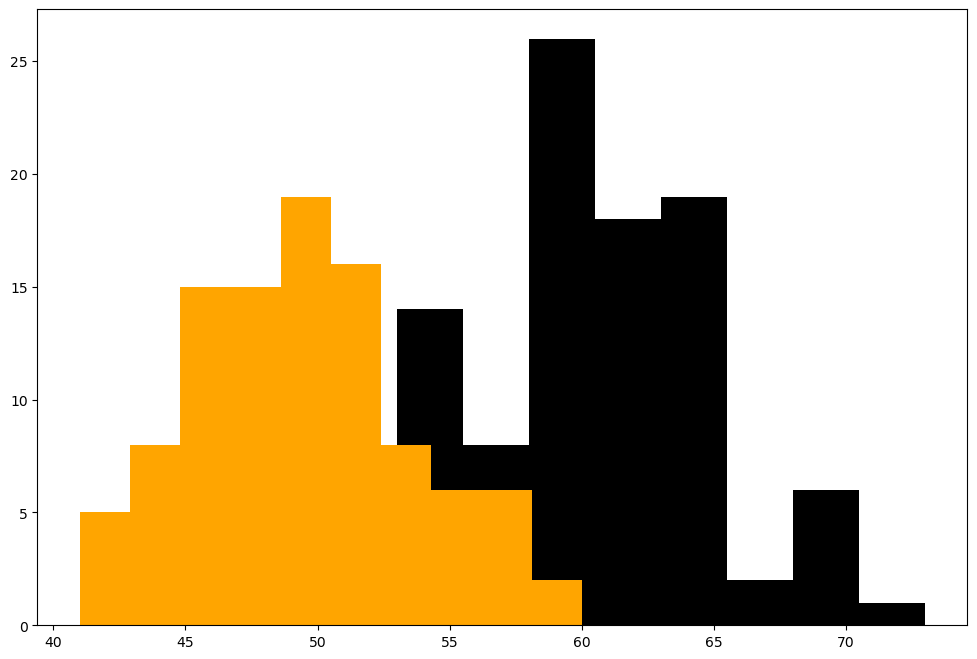

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.hist(df["men"], color="black")
ax1.hist(df["women"], color="orange")



In [20]:
stats.shapiro(df["women"]) # -> данные распределный нормально 16% > 5%

ShapiroResult(statistic=0.9810583591461182, pvalue=0.16059483587741852)

In [22]:
stats.shapiro(df["men"]) # -> данные распределный нормально 67% > 5%


ShapiroResult(statistic=0.9900975823402405, pvalue=0.6724860072135925)

In [24]:
# Тест Левана
stats.levene(df.men, df.women) # -> дисперсия ранвы

LeveneResult(statistic=0.2644266082613287, pvalue=0.6076686464894372)

In [25]:
# Независимость 

In [27]:
# Т-критерий Стьютента
stats.ttest_ind(df.men, df.women) # -> H0 отвергаем 

TtestResult(statistic=16.422524648309142, pvalue=8.206721395990692e-39, df=198.0)

In [30]:
stats.ttest_ind(df.men, df.women, equal_var=False)

TtestResult(statistic=16.422524648309142, pvalue=9.940369712406374e-39, df=196.66421202306847)

In [32]:
stats.ttest_ind(df.men, df.women, equal_var=False, alternative='greater')


TtestResult(statistic=16.422524648309142, pvalue=4.970184856203187e-39, df=196.66421202306847)

### Зависимые выборки



In [35]:
df2 = pd.read_csv("data/21.5 dependent_t.csv")
df2.head()

,id,pre,post
0,928,71.709023,76.969025
1,813,64.603133,75.304607
2,863,72.447850,82.358080
3,618,68.202316,72.145752
4,865,66.706736,79.344155


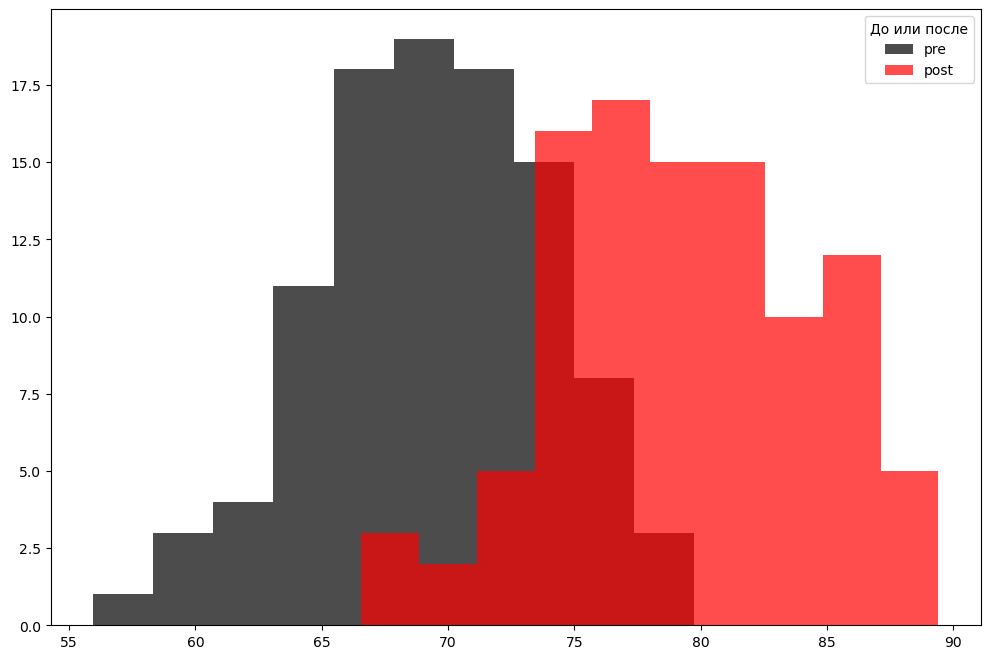

In [46]:
colors = {"pre": "black", "post": "red"}

fig, ax = plt.subplots(figsize=(12, 8))
for categoty in colors:
    ax.hist(df[categoty], color=colors[categoty], alpha=0.7)

plt.legend(colors, title="До или после")

In [47]:
stats.shapiro(df2.pre) # 94 > 5 -> принимаем H0 -> выборки нормально распределены

ShapiroResult(statistic=0.9940342307090759, pvalue=0.9418994188308716)

In [49]:
stats.shapiro(df2.post)


ShapiroResult(statistic=0.985990047454834, pvalue=0.3733612596988678)

In [52]:
stats.ttest_rel(df2.pre, df2.post, alternative='less') # H0 отвергаем -> знания увеличились

TtestResult(statistic=-16.160279927323444, pvalue=8.089311044408884e-30, df=99)

In [54]:
# Ненормально распределеные выборки и независимы
df3 = pd.read_csv("data/21.5 mann_whitney.csv")
df3.head()

,feedback,age
0,5,28
1,5,28
2,4,26
3,4,18
4,2,15


In [57]:
df3.shape

(30, 2)

In [60]:
before18 = df3[df3['age'] <= 18].feedback
after18 = df3[df3['age'] > 18].feedback

In [63]:
print(stats.shapiro(before18)) 
print(stats.shapiro(after18))
# Данные распределены ненормально

ShapiroResult(statistic=0.869794487953186, pvalue=0.033507298678159714)
ShapiroResult(statistic=0.7914904952049255, pvalue=0.0028649710584431887)


In [66]:
stats.mannwhitneyu(before18, after18, alternative="greater") # Принимаем H0 

MannwhitneyuResult(statistic=46.0, pvalue=0.9978023851377417)

In [68]:
stats.mannwhitneyu(before18, after18, alternative="less")

MannwhitneyuResult(statistic=46.0, pvalue=0.002509619590681187)

In [70]:
# Зависимы и ненормальные
df4 = pd.read_csv("data/21.6 signed_wilcoxon.csv")
df4.head()

,before,after
0,6,6
1,5,6
2,12,1
3,12,11
4,3,11


In [72]:
print(stats.shapiro(df4["before"])) # Данные распределены ненормально
print(stats.shapiro(df4["after"]))


ShapiroResult(statistic=0.8824636936187744, pvalue=0.0032130188774317503)
ShapiroResult(statistic=0.9091560244560242, pvalue=0.014169566333293915)


In [74]:
stats.wilcoxon(df4["before"], df4["after"], alternative="greater") # Не отбрасываем H0

c:\Users\lorex\anaconda3\envs\DataScience\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=132.0, pvalue=0.7946318573868679)